In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [6]:
df = pd.read_excel("premiums_with_life_style.xlsx")
df.head(5)
df.columns = df.columns.str.replace(" ","_").str.lower()
df.head(3)
df.shape

(10000, 15)

### Handle Missing values

In [7]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
physical_activity         0
stress_level              0
number_of_dependants      0
bmi_category              0
smoking_status            9
employment_status         7
income_level             18
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [8]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
physical_activity        0
stress_level             0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9973.000000,9973.000000,9973.000000,9973.000000
mean,41.319362,3.195628,23.382232,19503.816705
std,58.044687,21.679565,32.334811,8898.079736
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11774.000000
50%,37.000000,2.000000,16.000000,19314.000000
75%,50.000000,3.000000,31.000000,26500.000000
max,1178.000000,456.000000,960.000000,45854.000000


In [11]:
df.columns = df.columns.str.replace(' ', '_')


### Data cleaning

In [12]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([], dtype=int64)

### Numeric Columns

In [13]:
numeric_columns = df.select_dtypes(include=['float64','int64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

In [16]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'physical_activity',
       'stress_level', 'number_of_dependants', 'bmi_category',
       'smoking_status', 'employment_status', 'income_level', 'income_lakhs',
       'medical_history', 'insurance_plan', 'annual_premium_amount'],
      dtype='object')

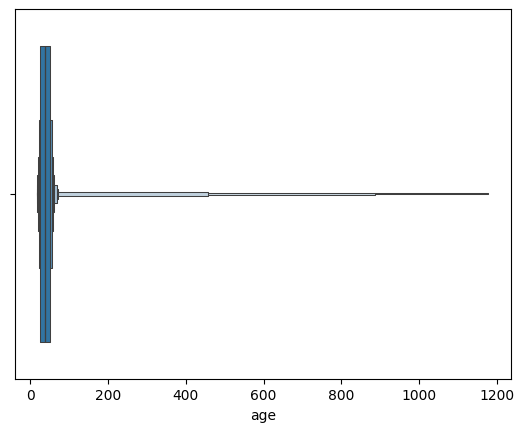

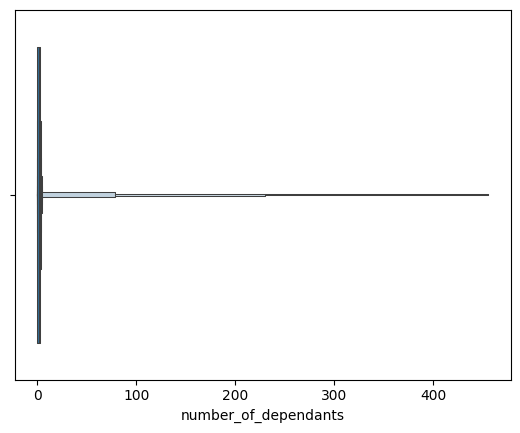

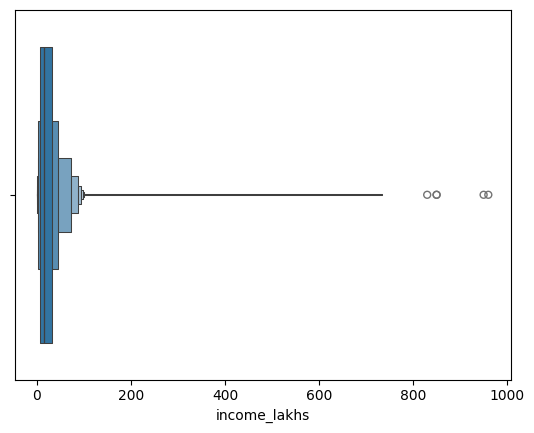

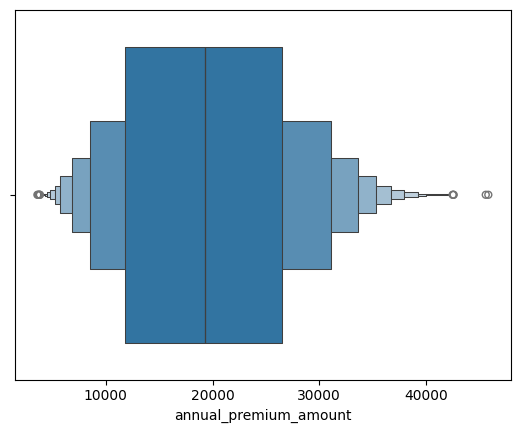

In [17]:
for col in numeric_columns:
    sns.boxenplot(x=df[col])
    plt.show()

In [18]:
df[df['age']>100]['age'].unique()

array([ 128, 1178,  567,  456])

In [19]:
df1 = df[df.age<=100]
df1.age.describe()

count    9915.000000
mean       37.743621
std        13.975462
min        18.000000
25%        24.000000
50%        37.000000
75%        50.000000
max        72.000000
Name: age, dtype: float64

In [20]:
def get_iqr_bound(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q1 + 1.5 * IQR
    return lower_bound,upper_bound

lower , upper = get_iqr_bound(df1['income_lakhs'])
lower,upper


(-31.5, 43.5)

In [21]:
df1[df1.income_lakhs>upper].shape

(1243, 15)

In [22]:
df1[df1.income_lakhs<lower].shape

(0, 15)

In [23]:
quatile_threshold = df1.income_lakhs.quantile(0.999)
quatile_threshold

np.float64(136.12000000048283)

In [24]:
df1[df1.income_lakhs>quatile_threshold].shape

(10, 15)

In [25]:

df2 = df1[df1.income_lakhs<=quatile_threshold].copy()
df2.shape
df2.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984


In [26]:
df2.number_of_dependants.describe()

count    9905.000000
mean        3.205553
std        21.753158
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max       456.000000
Name: number_of_dependants, dtype: float64

<Axes: xlabel='number_of_dependants', ylabel='Count'>

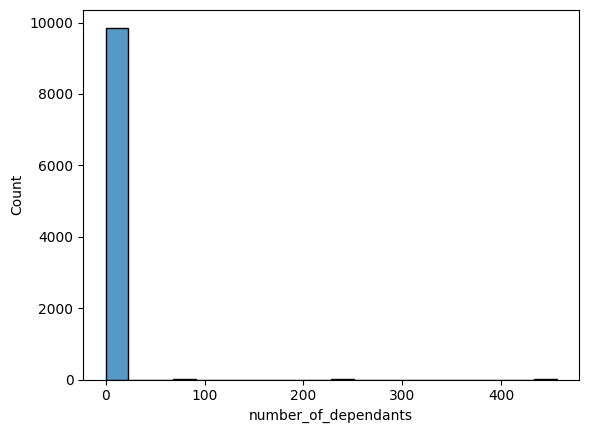

In [27]:
sns.histplot(df2.number_of_dependants, bins=20)

In [28]:
dependant_thresold = df2.number_of_dependants.quantile(0.99)
dependant_thresold

np.float64(5.0)

In [29]:
df3 = df2[df2.number_of_dependants<=dependant_thresold].copy()
df3.number_of_dependants.describe()

count    9858.000000
mean        1.919963
std         1.503027
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: number_of_dependants, dtype: float64

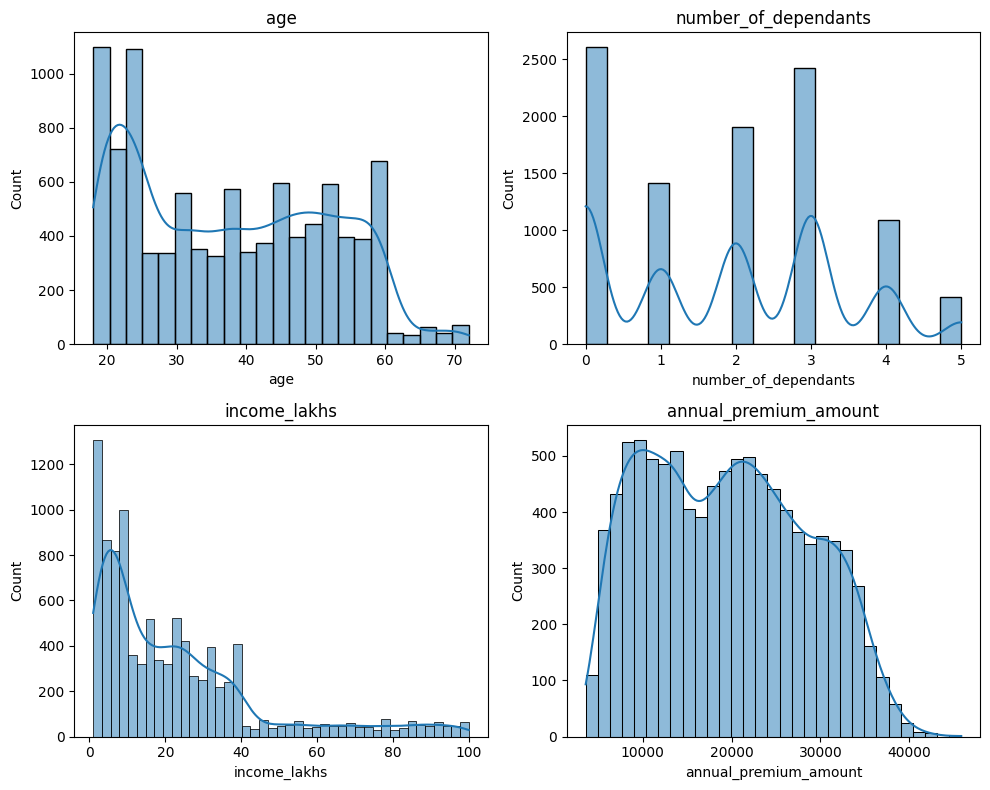

In [30]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))  # Adjust the size as necessary

for i, column in enumerate(numeric_columns):
    ax = axs[i//2, i%2]  # Determines the position of the subplot in the grid
    sns.histplot(df3[column], kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [31]:
df2.head(2)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108


In [32]:
numeric_columns


Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

### Bivariate Analysis: Numeric Columns

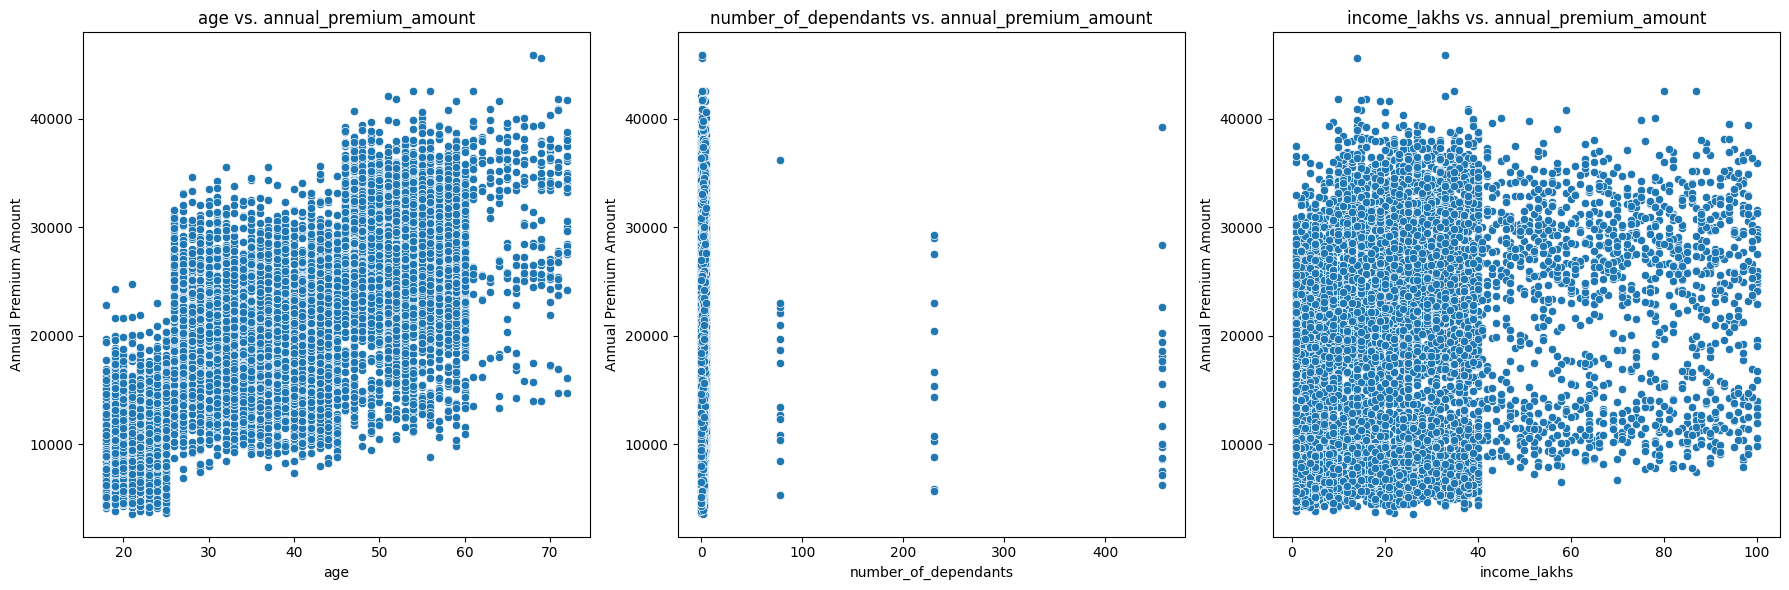

In [33]:
numeric_features = ['age', 'number_of_dependants', 'income_lakhs']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df2[column], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. annual_premium_amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

In [34]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'physical_activity',
       'stress_level', 'number_of_dependants', 'bmi_category',
       'smoking_status', 'employment_status', 'income_level', 'income_lakhs',
       'medical_history', 'insurance_plan', 'annual_premium_amount'],
      dtype='object')

In [35]:
categorical_cols = [ 'gender', 'region', 'marital_status', 'physical_activity','stress_level',  'bmi_category','smoking_status', 'employment_status', 'medical_history', 'insurance_plan', 'income_level']

for col in categorical_cols:
    print(col, ":", df2[col].unique())

gender : ['Female' 'Male']
region : ['Southeast' 'Northeast' 'Southwest' 'Northwest']
marital_status : ['Unmarried' 'Married']
physical_activity : ['Medium' 'Low' 'High']
stress_level : ['Medium' 'High' 'Low']
bmi_category : ['Normal' 'Overweight' 'Obesity' 'Underweight']
smoking_status : ['No Smoking' 'Occasional' 'Regular']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
medical_history : ['High blood pressure' 'No Disease' 'Thyroid'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid' 'Diabetes'
 'Heart disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease']
insurance_plan : ['Gold' 'Silver' 'Bronze']
income_level : ['25L - 40L' '10L - 25L' '<10L' '> 40L']


### Univariate Analysis

In [36]:
df3.head(2)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108


In [37]:
pct_gender = df3['gender'].value_counts(normalize=True)*100
pct_gender

gender
Female    59.870156
Male      40.129844
Name: proportion, dtype: float64

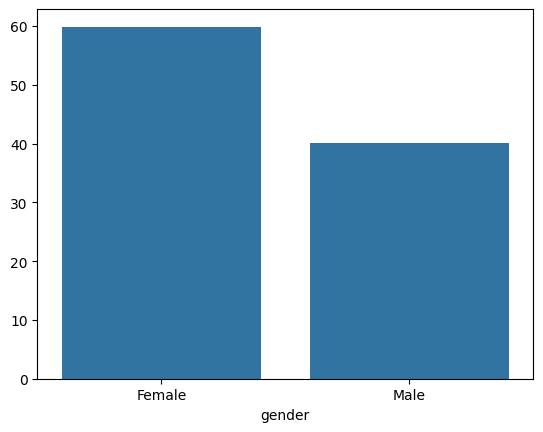

In [38]:
sns.barplot(x=pct_gender.index,y=pct_gender.values)
plt.show()

C:\Users\WaHeeD RaZa\AppData\Local\Temp\ipykernel_16116\3977316752.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.index, y=percentages.values, palette="Set2", ax=axes[i])
C:\Users\WaHeeD RaZa\AppData\Local\Temp\ipykernel_16116\3977316752.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.index, y=percentages.values, palette="Set2", ax=axes[i])
C:\Users\WaHeeD RaZa\AppData\Local\Temp\ipykernel_16116\3977316752.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.index, y=percentages.values, pa

IndexError: index 9 is out of bounds for axis 0 with size 9

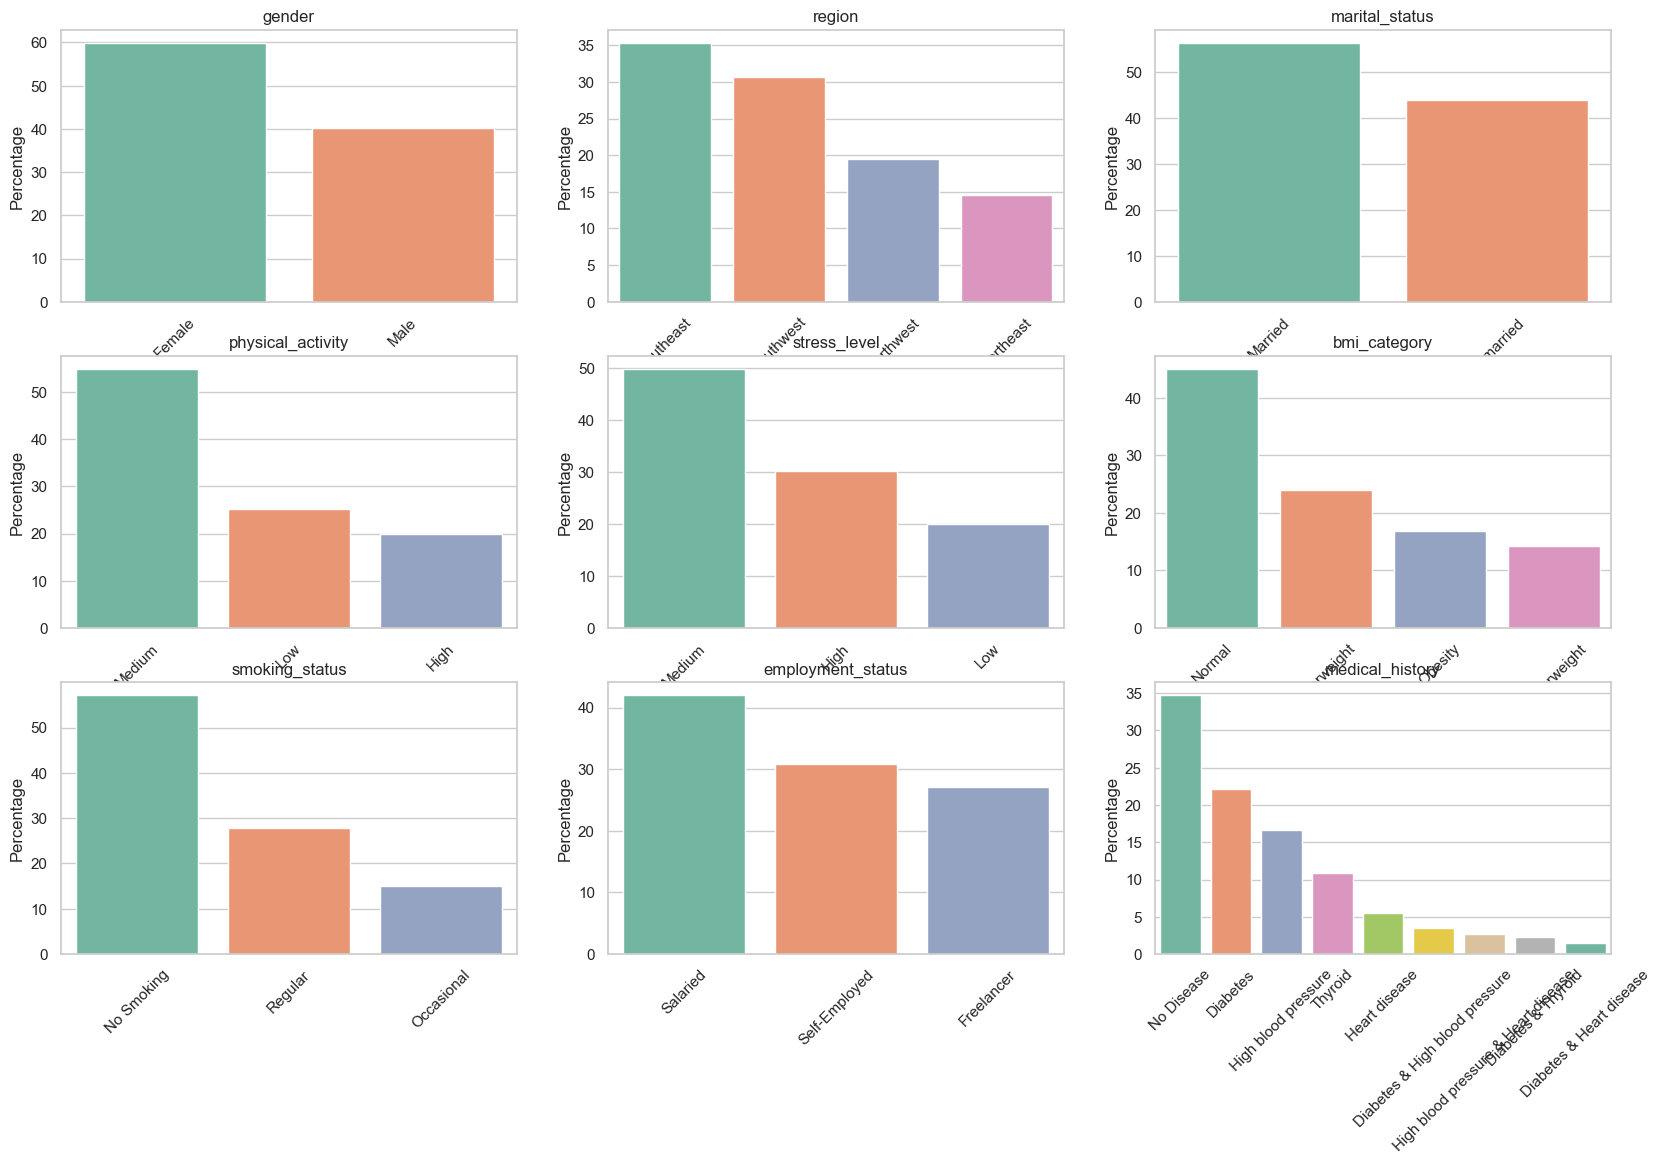

In [39]:




categorical_columns = [ 'gender', 'region', 'marital_status', 'physical_activity',
                        'stress_level',  'bmi_category','smoking_status', 'employment_status',
                        'medical_history', 'insurance_plan', 'income_level']


sns.set(style="whitegrid")

# Set up subplot grid: 3 rows × 4 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))
axes = axes.flatten()  # Flatten to make it easier to index

# Plot each categorical column
for i, col in enumerate(categorical_columns):
    percentages = df3[col].value_counts(normalize=True) * 100
    sns.barplot(x=percentages.index, y=percentages.values, palette="Set2", ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Percentage')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any extra subplot axes if less than 12
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          822   909     998
25L - 40L          533   733     733
<10L              2266   184    1366
> 40L               55   788     471


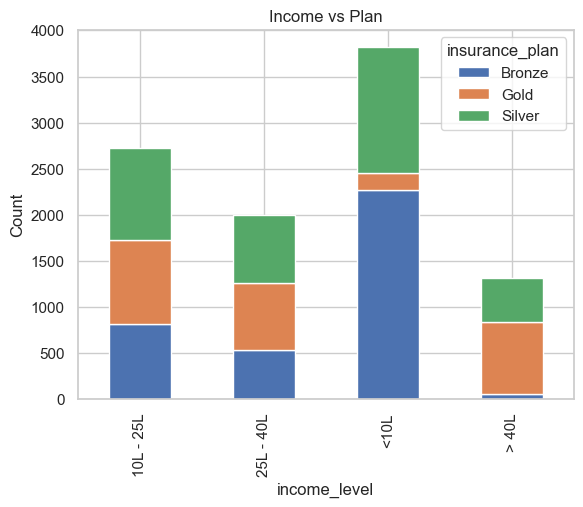

In [40]:
# Cross-tabulation of gender and smoking status
crosstab = pd.crosstab(df3['income_level'], df3['insurance_plan'])
print(crosstab)

# Plotting the crosstab
crosstab.plot(kind='bar', stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

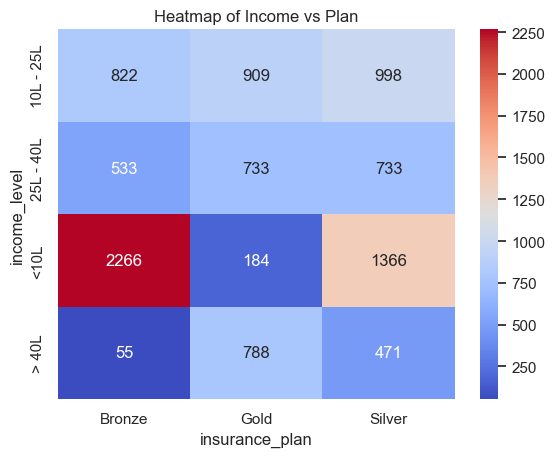

In [41]:
sns.heatmap(crosstab, annot=True, cmap='coolwarm',fmt="d")
plt.title('Heatmap of Income vs Plan')
plt.show()

<h2 align="center" style="color:red">Feature Engineering</h2>

In [42]:
df3.head(3)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459


In [43]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}



In [44]:
df3[['disease1','disease2']] = df3['medical_history'].str.split(" & " , expand=True).apply(lambda x: x.str.lower())
df3['disease1'].fillna('none',inplace=True)
df3['disease2'].fillna('none',inplace=True)
df3.head(2)

C:\Users\WaHeeD RaZa\AppData\Local\Temp\ipykernel_16116\3601350944.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['disease1'].fillna('none',inplace=True)
C:\Users\WaHeeD RaZa\AppData\Local\Temp\ipykernel_16116\3601350944.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944,high blood pressure,none
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108,no disease,none


In [45]:
df3['total_risk_score'] = 0  #initialize total_risk_score

for disease in ['disease1','disease2']:
    df3['total_risk_score'] += df3[disease].map(risk_scores) 

max_score = df3['total_risk_score'].max()
min_score = df3['total_risk_score'].min()
df3['normalized_risk_score'] = (df3['total_risk_score'] - min_score) / (max_score - min_score)
df3.head(3)


,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944,high blood pressure,none,6,0.428571
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108,no disease,none,0,0.000000
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459,no disease,none,0,0.000000


In [46]:
df3.physical_activity.unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [47]:
df3.stress_level.unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [48]:
def calculate_life_style_risk(row):
    physical_activity_risk_score = {
        "High": 0,
        "Medium": 1,
        "Low": 4
    }
    stress_risk_score = {
        "High": 4,
        "Medium": 1,
        "Low": 0
    }
    life_style_risk = physical_activity_risk_score[row['physical_activity']] + stress_risk_score[row['stress_level']]
    return life_style_risk

df3['lifestyle_risk_score'] = df3.apply(calculate_life_style_risk, axis=1)
df3.head(3)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score,lifestyle_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944,high blood pressure,none,6,0.428571,2
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108,no disease,none,0,0.000000,8
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459,no disease,none,0,0.000000,5


<Axes: xlabel='lifestyle_risk_score', ylabel='Count'>

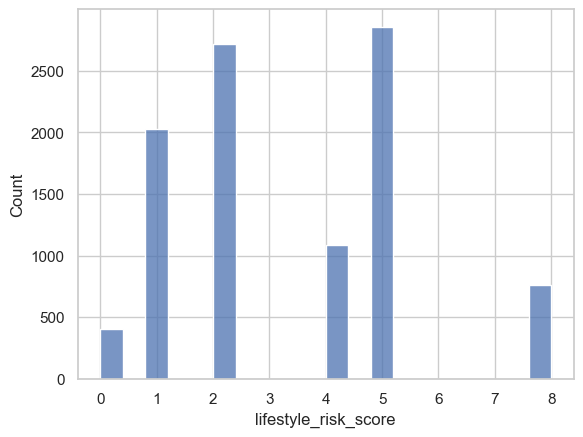

In [49]:
sns.histplot(df3.lifestyle_risk_score, bins=20)

In [50]:
df3.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score,lifestyle_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944,high blood pressure,none,6,0.428571,2
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108,no disease,none,0,0.000000,8
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459,no disease,none,0,0.000000,5
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685,thyroid,none,5,0.357143,1
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984,high blood pressure,heart disease,14,1.000000,5


In [51]:
print(df3['insurance_plan'].unique())
df3.insurance_plan.unique()


['Gold' 'Silver' 'Bronze']


array(['Gold', 'Silver', 'Bronze'], dtype=object)

### Encode Text Column

In [52]:
df3['insurance_plan'] = df3['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})
df3.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score,lifestyle_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,3,27944,high blood pressure,none,6,0.428571,2
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,2,21108,no disease,none,0,0.000000,8
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,1,8459,no disease,none,0,0.000000,5
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,2,21685,thyroid,none,5,0.357143,1
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,1,15984,high blood pressure,heart disease,14,1.000000,5


In [53]:
df3.income_level.unique()

array(['25L - 40L', '10L - 25L', '<10L', '> 40L'], dtype=object)

In [54]:
df3['income_level'] = df3['income_level'].map({'<10L':1,'10L - 25L': 2,'25L - 40L':3, '> 40L':4})
df3.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score,lifestyle_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,3,37,High blood pressure,3,27944,high blood pressure,none,6,0.428571,2
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,2,10,No Disease,2,21108,no disease,none,0,0.000000,8
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,1,9,No Disease,1,8459,no disease,none,0,0.000000,5
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,1,9,Thyroid,2,21685,thyroid,none,5,0.357143,1
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,2,13,High blood pressure & Heart disease,1,15984,high blood pressure,heart disease,14,1.000000,5


In [55]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df4 = pd.get_dummies(df3, columns=nominal_cols, drop_first=True, dtype=int)
df4.head(3)

,age,physical_activity,stress_level,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,56,Medium,Medium,2,3,37,High blood pressure,3,27944,high blood pressure,...,1,0,1,0,0,0,0,0,0,1
1,38,Low,High,5,2,10,No Disease,2,21108,no disease,...,0,0,0,0,1,0,1,0,0,0
2,18,Medium,High,0,1,9,No Disease,1,8459,no disease,...,0,1,1,0,0,0,0,0,0,0


In [56]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9858 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              9858 non-null   int64  
 1   physical_activity                9858 non-null   object 
 2   stress_level                     9858 non-null   object 
 3   number_of_dependants             9858 non-null   int64  
 4   income_level                     9858 non-null   int64  
 5   income_lakhs                     9858 non-null   int64  
 6   medical_history                  9858 non-null   object 
 7   insurance_plan                   9858 non-null   int64  
 8   annual_premium_amount            9858 non-null   int64  
 9   disease1                         9858 non-null   object 
 10  disease2                         9858 non-null   object 
 11  total_risk_score                 9858 non-null   int64  
 12  normalized_risk_score    

### Feature Selection

In [57]:
df5 = df4.drop(['medical_history','disease1', 'disease2', 'total_risk_score','physical_activity','stress_level'], axis=1)
df5.head(3)                

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,lifestyle_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,56,2,3,37,3,27944,0.428571,2,0,0,1,0,1,0,0,0,0,0,0,1
1,38,5,2,10,2,21108,0.000000,8,0,0,0,0,0,0,1,0,1,0,0,0
2,18,0,1,9,1,8459,0.000000,5,0,0,0,1,1,0,0,0,0,0,0,0


In [58]:
df5.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'normalized_risk_score',
       'lifestyle_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

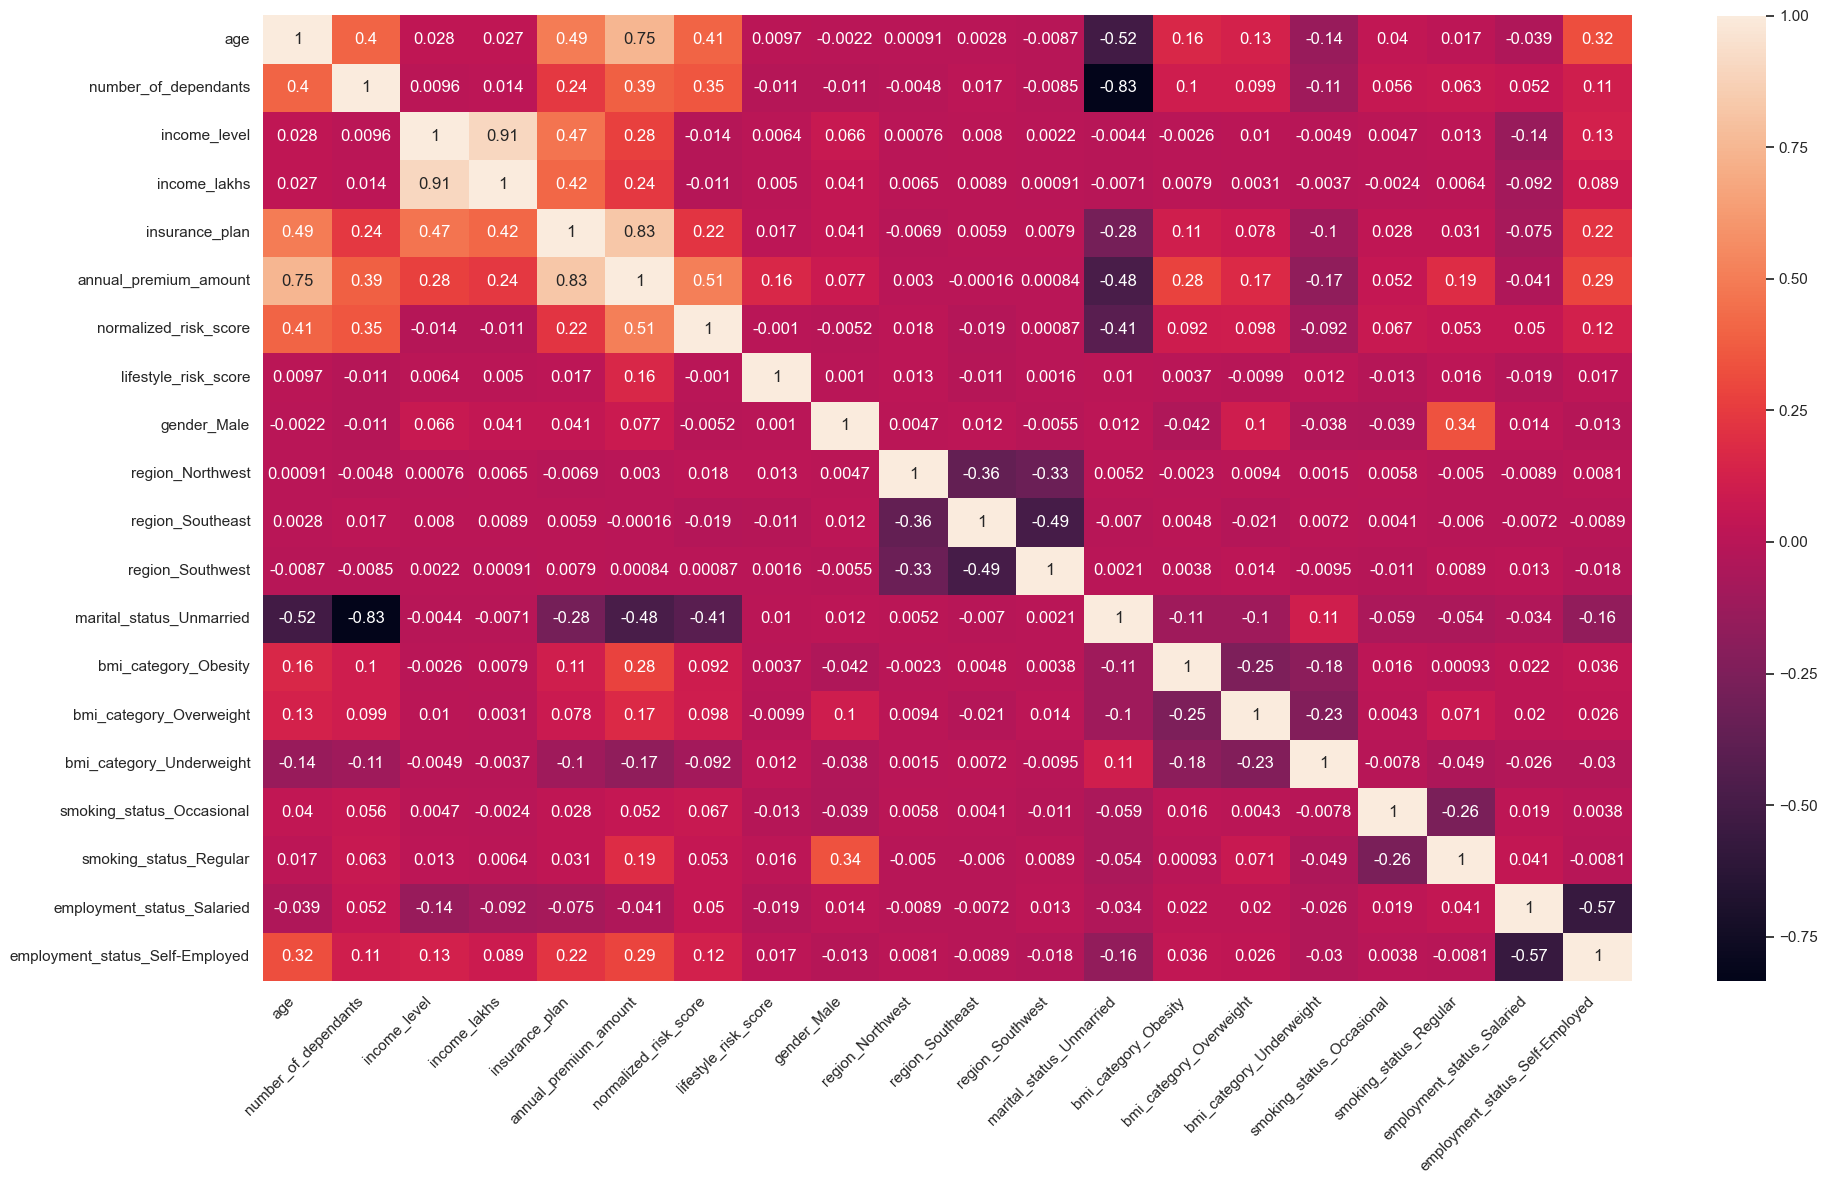

In [59]:
cm = df5.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [60]:
X = df5.drop('annual_premium_amount',axis='columns')
Y = df5['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan', 'lifestyle_risk_score']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
print(X.head())
X.describe()

        age  number_of_dependants  income_level  income_lakhs  insurance_plan  \
0  0.703704                   0.4      0.666667      0.363636             1.0   
1  0.370370                   1.0      0.333333      0.090909             0.5   
2  0.000000                   0.0      0.000000      0.080808             0.0   
3  0.685185                   0.6      0.000000      0.080808             0.5   
4  0.074074                   0.4      0.333333      0.121212             0.0   

   normalized_risk_score  lifestyle_risk_score  gender_Male  region_Northwest  \
0               0.428571                 0.250            0                 0   
1               0.000000                 1.000            0                 0   
2               0.000000                 0.625            0                 0   
3               0.357143                 0.125            1                 0   
4               1.000000                 0.625            1                 0   

   region_Southeast  regio

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,lifestyle_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000
mean,0.366014,0.383993,0.360756,0.219027,0.446135,0.326537,0.408349,0.401298,0.194664,0.353013,0.306452,0.437716,0.167985,0.240414,0.141712,0.150030,0.278657,0.420065,0.308176
std,0.258820,0.300605,0.352198,0.226801,0.395765,0.279083,0.268302,0.490186,0.395962,0.477931,0.461043,0.496131,0.373872,0.427356,0.348773,0.357119,0.448361,0.493594,0.461763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.050505,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.351852,0.400000,0.333333,0.151515,0.500000,0.428571,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.592593,0.600000,0.666667,0.303030,1.000000,0.428571,0.625000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [62]:
calculate_vif(X)

,Column,VIF
0,age,5.541063
1,number_of_dependants,5.320401
2,income_level,12.548788
3,income_lakhs,10.947288
4,insurance_plan,4.147071
5,normalized_risk_score,3.001706
6,lifestyle_risk_score,3.110913
7,gender_Male,1.910118
8,region_Northwest,2.082989
9,region_Southeast,2.952809


In [63]:
calculate_vif(X.drop('income_level',axis="columns"))

,Column,VIF
0,age,5.488217
1,number_of_dependants,5.306542
2,income_lakhs,2.450579
3,insurance_plan,3.875312
4,normalized_risk_score,3.001684
5,lifestyle_risk_score,3.110034
6,gender_Male,1.901611
7,region_Northwest,2.082813
8,region_Southeast,2.951877
9,region_Southwest,2.678296


In [64]:
X_reduced = X.drop('income_level', axis="columns")

<h2 align="center" style="color:red">Model Training</h2>

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, Y, test_size=0.30, random_state=10)

# shape of the X_train, X_test, y_train, y_test features
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (6900, 18)
x test:  (2958, 18)
y train:  (6900,)
y test:  (2958,)


### Linear Regression

In [66]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
test_score = model_lr.score(X_test,y_test)
train_score = model_lr.score(X_train,y_train)
test_score,train_score

(0.9572516785678009, 0.9586426437876246)

In [67]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test,y_pred)
print("MSE :",mse_lr)
rmse_lr = np.sqrt(mse_lr)
print("RMSE :",rmse_lr)

MSE : 3320807.903487829
RMSE : 1822.3083996645105


In [68]:
X_test.shape

(2958, 18)

In [69]:
np.set_printoptions(suppress=True, precision=3)
model_lr.coef_

array([10675.838,  -671.11 ,  -708.276, 13311.847,  6521.439,  4724.387,
          11.961,    77.062,    88.325,    -9.701,  -820.805,  4166.096,
        2119.216,   413.65 ,  1159.509,  3116.483,    17.895,   382.996])

In [70]:
features_importance = model_lr.coef_

coef_df = pd.DataFrame(features_importance,index=X_train.columns , columns=['Coefficients'])

coef_df = coef_df.sort_values(by='Coefficients', ascending=True)
coef_df.head()

,Coefficients
marital_status_Unmarried,-820.804958
income_lakhs,-708.275605
number_of_dependants,-671.110352
region_Southwest,-9.701258
gender_Male,11.961022


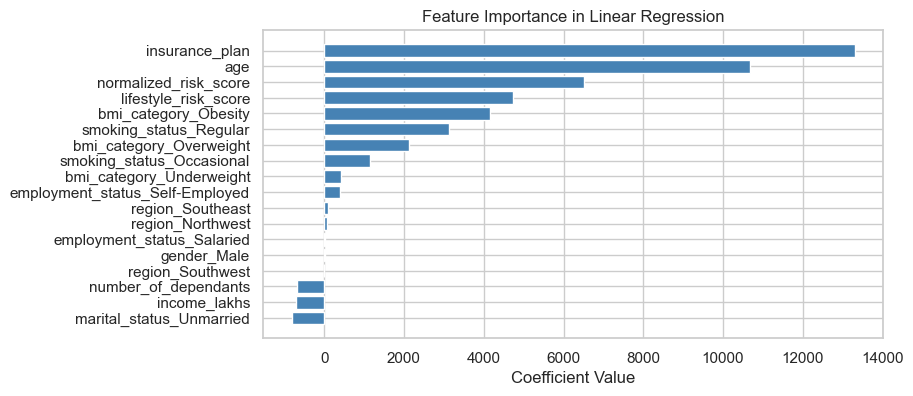

In [71]:
# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

### XGBOOST

In [72]:
from xgboost import XGBRegressor


model_xgb = XGBRegressor(n_estimators=20,max_depth = 3)
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test, y_test)

0.9886000156402588

In [73]:
y_pred = model_xgb.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

XGBoost Regression ==> MSE:  885582.3125 RMSE:  941.0538308194701


In [74]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

np.float64(0.9925432205200195)

In [75]:
random_search.best_params_


{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [76]:
best_model = random_search.best_estimator_
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

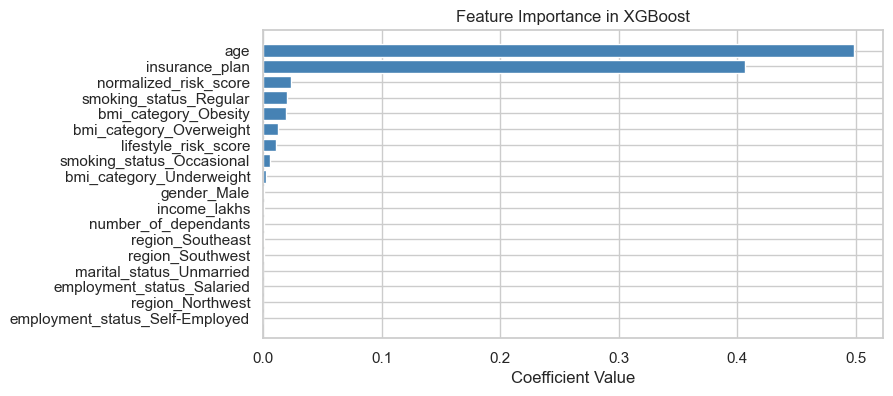

In [77]:
feature_importance = best_model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

In [78]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = (residuals / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
3021,13354,12226.655273,-1127.344727,-8.442000
6049,10701,11696.637695,995.637695,9.304156
6146,15146,16290.446289,1144.446289,7.556096
6418,8743,9265.954102,522.954102,5.981403
1537,27887,26731.242188,-1155.757812,-4.144432


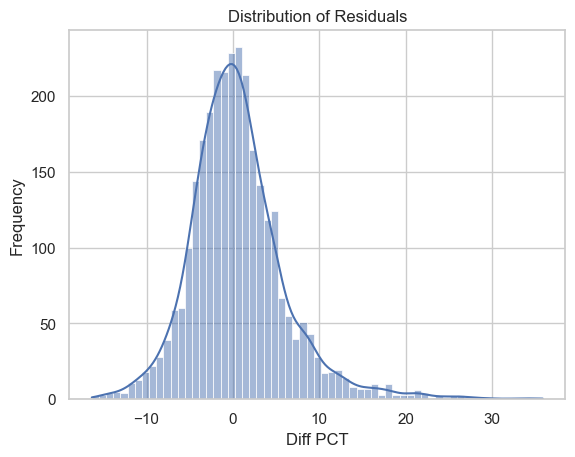

In [79]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [80]:
extreme_error_threshold = 10  # You can adjust this threshold based on your domain knowledge or requirements
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.head()

,actual,predicted,diff,diff_pct
7800,9632,8650.812500,-981.187500,-10.186747
9814,6655,5948.608398,-706.391602,-10.614449
9970,6484,7225.738770,741.738770,11.439525
6882,14831,12876.333008,-1954.666992,-13.179603
5015,9981,11260.881836,1279.881836,12.823182


In [81]:
X_test.shape

(2958, 18)

In [82]:
extreme_results_df.shape

(204, 4)

In [83]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0]
extreme_errors_pct

6.896551724137931

There is about 6.9% extreme errors

In [85]:
from joblib import dump

dump(best_model,"artifacts/model_rest.joblib")
scaler_with_cols = {
    'scaler':scaler,
    'cols_to_scale':cols_to_scale,
}

dump(scaler_with_cols,"artifacts/scaler_rest.joblib" )

['artifacts/scaler_rest.joblib']